# Assignment 2: Engineering Predictive Features

**Student Name:** [Your Name Here]

**Date:** [Date]

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [36]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv("data/train.csv") # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset
print(df.head())  # Replace with df.head()
print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [63]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    'BedroomAbvGr',
    'TotalBsmtSF',
    'FullBath',
    'TotRmsAbvGrd',
    'GarageArea',
    'LotArea',
    'YrSold',
    'MoSold',
    'HalfBath',
    'PoolArea',
    'LotFrontage',
    'MSSubClass',
    'SalePrice',
    # Add more features here
]

# TODO: Create X (features) and y (target) for baseline
X_baseline = df[baseline_features]  # Replace with your feature matrix
# Make sure to handle missing values and encode categorical variables
X_baseline = X_baseline.fillna(X_baseline.median())  # Replace with your feature matrix
y = df["SalePrice"] # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Feature matrix shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 16
Feature matrix shape: (1460, 16)
Target variable shape: (1460,)


### Preprocess Baseline Features

In [27]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent
numeric_cols = X_baseline.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_baseline.select_dtypes(include=['object']).columns
X_baseline[numeric_cols] = X_baseline[numeric_cols].fillna(
    X_baseline[numeric_cols].median()
)
X_baseline[categorical_cols] = X_baseline[categorical_cols].fillna('None')
# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features
X_baseline = pd.get_dummies(X_baseline, drop_first=True)

print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 15)
Missing values: 0


### Train Baseline Model

In [31]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)  # Replace with train_test_split()

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)  # Replace with trained model
baseline_model.fit(X_train, y_train)

# Make predictions
# TODO: Generate predictions on test set
baseline_predictions = baseline_model.predict(X_test) # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions)) # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8663109478977407
RMSE: $32,022.47


### Visualize Baseline Feature Importances

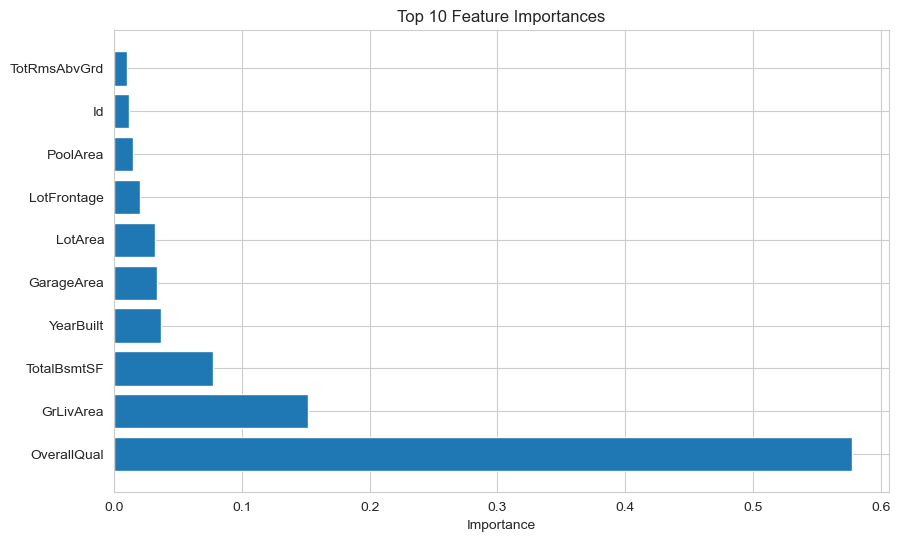


CHECKPOINT: Review which raw features are most important


In [33]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
# TODO: Create a horizontal bar plot of top 10 features
importance = baseline_model.feature_importances_  # Replace with feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_baseline.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)
plt.figure()
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()
print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining what this feature measures, why it should predict house prices, and what real estate intuition supports it]

In [38]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
print(df['HouseAge'])

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: HouseAge, Length: 1460, dtype: int64


### Feature 2: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

In [61]:
# TODO: Create your second engineered feature
df['TotalPropertyArea'] = df['GrLivArea'] + df['LotArea']
print(df['TotalPropertyArea'])

0       10160
1       10862
2       13036
3       11267
4       16458
        ...  
1455     9564
1456    15248
1457    11382
1458    10795
1459    11193
Name: TotalPropertyArea, Length: 1460, dtype: int64


### Feature 3: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

In [59]:
# TODO: Create your third engineered feature
df['QualityLotScore'] = df['OverallQual'] * df['LotArea']
print(df['QualityLotScore'])

0        59150
1        57600
2        78750
3        66850
4       114080
         ...  
1455     47502
1456     79050
1457     63294
1458     48585
1459     49685
Name: QualityLotScore, Length: 1460, dtype: int64


### Feature 4: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

In [76]:
# TODO: Create your fourth engineered feature
df['LargeGarage'] = df['GarageArea'] > 400 
print(df['LargeGarage'])

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456     True
1457    False
1458    False
1459    False
Name: LargeGarage, Length: 1460, dtype: bool


### Feature 5: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

In [64]:
# TODO: Create your fifth engineered feature
df['PricePerSF'] = df['SalePrice'] / df['GrLivArea']
print(df['PricePerSF'])

0       121.929825
1       143.819334
2       125.139978
3        81.537566
4       113.739763
           ...    
1455    106.253795
1456    101.302460
1457    113.888889
1458    131.841373
1459    117.436306
Name: PricePerSF, Length: 1460, dtype: float64


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [ ]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [ ]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = [
    'HouseAge',
    'TotalPropertyArea',
    'QualityLotScore',
    'LargeGarage',
    'PricePerSF',
    # Add your engineered feature names here
]

# Combine baseline and engineered features (excluding SalePrice from baseline_features)
features_to_use = [f for f in baseline_features if f != 'SalePrice'] + engineered_features

# Select only features that exist in df after one-hot encoding
X_engineered = df[[col for col in features_to_use if col in df.columns]]

print(f"Total features in engineered model: {X_engineered.shape[1]}")
print(f"New engineered features: {len(engineered_features)}")
print(f"Feature matrix shape: {X_engineered.shape}")

KeyError: "['LotFrontage'] not in index"

In [ ]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = None, None, None, None

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = None  # Replace with trained model

# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = None  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = None  # Replace with r2_score()
engineered_rmse = None  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)

---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [ ]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison = None  # Replace with pd.DataFrame()

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO: Display comparison table

print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")

### Visualize Feature Importances from Engineered Model

In [ ]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
# TODO: Create horizontal bar plot of top 15 features



### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- [Which of YOUR engineered features appeared in the top 15 most important features?]
- [Why do you think these specific features performed well?]
- [Were any engineered features less valuable than you expected? Why?]
- [What did you learn about feature engineering from this analysis?]
- [If you were to create more features, what would you try based on these results?]

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.